In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
df = pd.read_csv('./cancer-patient-data-sets.csv')

In [13]:
df.drop(columns=["index", "Patient Id"], inplace=True, errors="ignore")

In [14]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [15]:
X = df.drop(columns=["Level"])
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)

# Accuracy
dt_acc = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", dt_acc)
print("\nDecision Tree Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 1.0

Decision Tree Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [18]:

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_acc)
print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (RF)': rf_model.feature_importances_,
    'Importance (DT)': dt_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance (RF)", ascending=False)
print("\n🔹 Feature Importance (Random Forest):\n", feature_importance)



Random Forest Accuracy: 1.0

Random Forest Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


🔹 Feature Importance (Random Forest):
                      Feature  Importance (RF)  Importance (DT)
13         Coughing of Blood         0.108726         0.407116
9                    Obesity         0.096352         0.109362
11            Passive Smoker         0.092527         0.000000
17                  Wheezing         0.068955         0.252494
14                   Fatigue         0.063759         0.000000
10                   Smoking         0.051886         0.000000
4               Dust Allergy         0.044032         0.000000
19  Clubbing of Finger

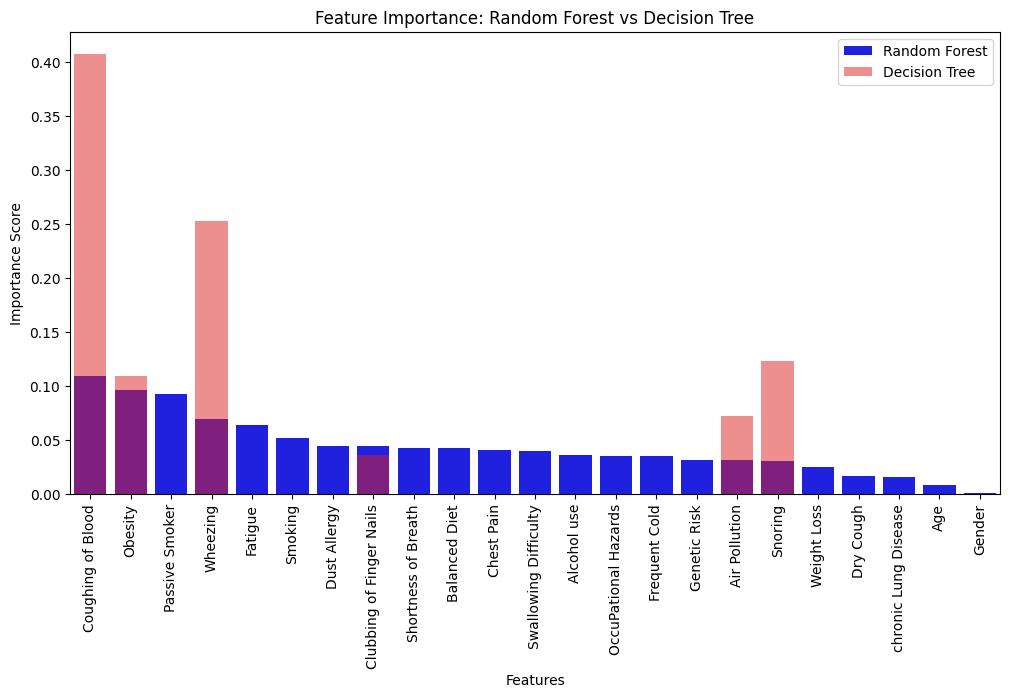

In [19]:
# Graph: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Feature"], y=feature_importance["Importance (RF)"], color="blue", label="Random Forest")
sns.barplot(x=feature_importance["Feature"], y=feature_importance["Importance (DT)"], color="red", label="Decision Tree", alpha=0.5)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance: Random Forest vs Decision Tree")
plt.xticks(rotation=90)
plt.legend()
plt.show()